# The Aging US Congress in the Age of Technology

Author: Jared Hyatt

---

## Introduction

We live in the age of the tech companies. Companies like Apple, Google, Facebook, and Amazon are generating huge amounts of revenue and taking over their markets. Google dominates online searches, Facebook is king in social media, and Amazon drives the online retail market. This is not new information. People have known this for a while and a quick Google search (even writing that I inadvertantly wrote Google search rather than online search) will provide tons of information and articles about the growth of massive tech companies.

As these companies grow and start to dominate more and more markets, other businesses are being forced to close down and in some eyes these tech companies are looking more and more like the monopolies America saw during the Industrial Revolution. And just like back then, <a href="https://www.wsj.com/articles/techs-titans-tiptoe-toward-monopoly-1527783845"> some people are starting to notice</a>. People are starting to call on the government to take on these tech giants and <a href="http://fortune.com/2018/04/02/tech-monopolies-small-businesses-competition/">reign them in</a>. And while this is happening, controversies like <a href="https://www.nytimes.com/2018/09/28/technology/facebook-hack-data-breach.html">Facebook's data breach</a> and other data breaches are becoming more and more common. 

Now, there are differing opinions on the severity of these problems and how to deal with them. I will not lecture you on my opinion here, but I encourage you to read more about these issues and form your own opinons. But, regardless of your opinions on these issues a simple fact remains that we are living in an age of technology. The question becomes: is our Congress prepared to govern in this new age?   

Now, as of now most people seem to agree that Congress already isn't doing a great job, given their <a href="https://news.gallup.com/poll/1600/congress-public.aspx">21% approval rating</a>. But I want to look a little deeper into their knowledge of technology and why they may not be doing a great job (at least with respect to tech). There are many articles <a href="https://www.washingtonpost.com/news/the-switch/wp/2018/06/06/i-can-understand-about-50-percent-of-the-things-you-say-how-congress-is-struggling-to-get-smart-on-tech/?utm_term=.4ef35d1e868d">like this one</a> that highlight how Congress is struggling to keep up with technological advancements. While there are likely many factors that contribute to why Congress lags behind in technological understanding, I want to investigate one in particular today: age. Based off of my basic (and likely biased) knowledge of Congress, it seems that most members are much older than the average American and likely grew up in a time before computers were prevalent (Note: computers only became common household items in the <a href="https://www.statista.com/statistics/184685/percentage-of-households-with-computer-in-the-united-states-since-1984/">late 90s and early 2000s</a>!) Therefore, learning more about the age composition of our current Congress could be an important indicator of their understanding/exposure to technology. So today we will be analyzing the age of current and past Congress's and answering a few questions: Is Congress really older than other US industries? Are they getting older or younger? And most importantly, what is contributing to the aging of Congress?

---

### A Couple Notes about Congress:

For those that may not know, it is useful to keep the following things in mind for the rest of the article:
   
   1. In order to be a member of the House of Representatives you must be at least 25
   2. Representatives in the House serve two year terms
   3. In order to be a member of the Senate you must be at least 30
   4. Senators serve six year terms
  
---

### Outline
1. Getting Started
    - 1.1 Required Libraries
    - 1.2 Data Sources
2. Processing the Data
    - 2.1 Congressional Data
    - 2.2 Life Expectancy Data
    - 2.3 Industry Data
3. Congress Compared to Other Industries
    - 3.1 Is Congress really older?
    - 3.2 How much older is Congress?
4. Is Congress Aging?
5. Why is Congress Aging?
    - 5.1 Term Counts!
    - 5.2 Re-Election of Incumbents
    - 5.3 Age of Non-Incumbents Increasing?
6. Conclusions
7. Data Sources

---

## 1. Getting Started

### 1.1 Required Libraries

First, we import all the libraries we'll be using:

- pandas: used for viewing, cleaning, and processing data
- re - regex: regular expression library used to search strings for particular values
- matplotlib: used for plotting data
- seaborn: provides more capabilities for plotting data with matplotlib
- scipy.stats: provides a variety of statistical methods and hypothesis tests
        
Note: we also set the number of columns and rows for pandas to dispaly to make sure we don't clog up the page with dataframes.

In [1]:
#Import all libraries we need
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the number of rows and columns displayed in each dataframe output
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)

### 1.2 Data Sources

Today we'll be using a few different sources, pulling in different data at different points during our analysis. Though I'm laying out all my sources nicely in the beginning (for the sake of brevity and easy reading), I want to be transparent and say that it took multiple iterations to figure out what data would be useful and relevant. I found one dataset, processed it, explored it a bit and realized that some other data could be very useful and restarted the whole process for the next set. That's often the way the process goes!

#### Congressional Data

Our main dataset is one that has detailed information on each Congressional member from the 80th Congress (1947) to the 113th Congress (2013). The dataset is provided through Five Thirty Eight's Github Page <a href="https://github.com/fivethirtyeight/data/tree/master/congress-age">here</a>, which pulls the data from a variety of sources as stated on the page. The data includes the following information:

- Congress Number
- Chamber: House or Senate 
- Bioguide: See below
- First, middle, and last name
- Birthday
- State
- Party: Democrat or Republican
- Incumbent: whether or not they were an incumbent
- Age

*Note: the "bioguide" column is a unique ID for each member of congress that can be used to look up information on them as detailed <a href="https://www.congress.gov/help/field-values/member-bioguide-ids"> here</a>. For our application it is mostly useful as a unique identifier for different Congressmembers. We later use this to easily distinguish Congressmembers from each other (more easily than names, etc. which may have duplicates).*

#### Life Expectancy Data

If we are analyzing the age of a specific group over a longer period of time, it is important to adjust for life expectancy. If we found that Congressmembers were significantly older in 2000 than in 1950 that may be due to changes in life expectancy rather than people voting in older people relative to the population age. Accordingly, we include the life expectancy data to adjust for this.

This data comes from the CDC and can be found at data.gov <a href="https://catalog.data.gov/dataset/age-adjusted-death-rates-and-life-expectancy-at-birth-all-races-both-sexes-united-sta-1900">here</a>. The dataset is very basic and simply details the average life expectancy for each year from 1900 - 2015 by race and gender.

#### Industry Data

Now that we have information on the age of Congress and can account for changes in life expectancy over time we need something to compare Congress to! In order to get an idea of how Congress stacks up to the rest of America, I found information on the age of the American labor force from the <a href="https://www.bls.gov/cps/demographics.htm#age">Bureau of Labor Statistics</a> from 2011 - 2017. This data details the number of workers in each major industry (and all smaller industries included in the larger industries) by age range and also gives the median worker age for each industry. Though there is a wealth of information here, we are mostly concerned with the median age of workers across different major industries, so we'll only be using this small subset of the data. 

---

## 2. Processing the Data

### 2.1 Congressional Data

First, we import and view the Congressional data to see what we're dealing with. Luckily, this data is pretty clean already so there's not a lot we need to do here. 

In [2]:
# Import and view data
congress = pd.read_csv('congress-terms.csv')
congress.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1/3/47,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1/3/47,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1/3/47,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1/3/47,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1/3/47,78.3


One thing that could be useful for this data is to add a column that shows the year that each Congressmember started their term. To do this we use regular expressions to extract the year from the "termstart" column and add it as a new column.

In [3]:
# Iterate over the dataframe and add a column that contains the year
for i, row in congress.iterrows():
    # Extract the year from the termstart column
    regex = re.match('\d{1,2}\/\d{1,2}\/(\d{2})', row['termstart'])
    year = int(regex.groups()[0])
    
    # Append the correct millenium to the year and add it to the dataframe
    if year > 40:
        congress.at[i, 'year'] = 1900 + year
    else:
        congress.at[i, 'year'] = 2000 + year

congress.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,year
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1/3/47,85.9,1947.0
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1/3/47,83.2,1947.0
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1/3/47,80.7,1947.0
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1/3/47,78.8,1947.0
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1/3/47,78.3,1947.0


Just like that, the Congressional data is ready for analysis.

### 2.2 Life Expectancy Data

Next, we import the life expectancy data. Like the Congressional data this is pretty clean, but there are a couple things to do. We are interested in using this data simply to compare the change in the age of Congressmembers to the changing life expectancy of Americans, so we don't need to distinguish life expectancy by race or gender. Therefore, we partition the data to extract only the values we need.

In [4]:
# Import and view the data
lifeExp = pd.read_csv('NCHS_-_Death_rates_and_life_expectancy_at_birth.csv')

print("Shape: {}".format(lifeExp.shape))
lifeExp.head()

Shape: (1044, 5)


,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


Here we group the data by sex and race and extract only the data that is for all genders and races. Notice that the size of the dataframe has shrunk significantly.

In [5]:
# Group by sex and race and select only the data we want
lifeExp = lifeExp.groupby('Sex').get_group('Both Sexes')
lifeExp = lifeExp.groupby('Race').get_group('All Races')

# View the new dataframe
print("Shape: {}".format(lifeExp.shape))
lifeExp.head()

Shape: (116, 5)


,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


Once we've extracted only the data we need, we drop the race, sex, and age-adjusted death rate columns since we will not be using them. Finally, we set the index to the "year" column to make extracting the life expectancy easier. We also drop all life expextancy data prior to 1947 to make comparisons between the Congressional and Life Expectancy data easier

In [6]:
lifeExp = lifeExp.drop(['Race', 'Sex', 'Age-adjusted Death Rate'], axis=1) # Drop columns we dont need
lifeExp = lifeExp.set_index('Year')                                        # Change the index to year
lifeExp = lifeExp.drop(lifeExp[lifeExp.index < 1947].index)                # Drop data prior to 1947

# Display the new dataframe
print("Shape: {}".format(lifeExp.shape))
lifeExp.head()

Shape: (69, 1)


,Average Life Expectancy (Years)
Year,
2015,NaN
2014,78.9
2013,78.8
2012,78.8
2011,78.7


### 2.3 Industry Data

With our other two datasets processed, we move on to the industry data. Taking a quick peek at the raw data we can see that its a mess. But luckily we are only interested in the median age of major industries to compare them to congress, so we can ignore the horrible schema and extract only the relevant information. 

In [7]:
# Import and view the dataset
industry_2017 = pd.read_excel('cpsaat11b_2017_unmod.xlsx')
industry_2017.head()

,HOUSEHOLD DATA ANNUAL AVERAGES 11b. Employed persons by detailed occupation and age,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,[Numbers in thousands],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Occupation,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,"Total, 16\nyears and\n over",16 to 19 \nyears,20 to 24 \nyears,25 to 34 \nyears,35 to 44 \nyears,45 to 54 \nyears,55 to 64 \nyears,65 years\nand over,Median\n age
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before we read the data into pandas I did a little bit of cleaning in excel to make extracting the data easier. I deleted the top two rows to ensure the column names were meaningful and cleaned up the column label for "Median Age" to ensure it was the exact same across all documents. With that done we have a new, slightly cleaner dataframe:

In [8]:
# Import the altered dataset
industry_2017 = pd.read_excel('cpsaat18b_2017.xlsx')
industry_2017.head()

,Industry,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total employed,153337.0,5074.0,14132.0,34439.0,31892.0,32503.0,26064.0,9234.0,42.2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Agriculture, forestry, fishing, and hunting",2454.0,92.0,176.0,422.0,439.0,464.0,463.0,399.0,47.2
4,Crop production,1202.0,38.0,82.0,209.0,234.0,219.0,227.0,194.0,46.9


With the CSV file cleaned up a bit, we can extract the relevant information pretty easily. First we build an empty dataframe with all the relevant years and industries that we would like to inspect. Then we simply read in each CSV file, pull the relevant information from it, and insert it into our dataframe.

In [9]:
# Enumerate the years and the major industries for which we want to extract data
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017]
industries = ['Agriculture, forestry, fishing, and hunting', 'Mining, quarrying, and oil and gas extraction', 
           'Construction', 'Manufacturing', 'Wholesale and retail trade', 'Transportation and utilities',
           'Information', 'Financial activities', 'Professional and business services', 
           'Education and health services', 'Leisure and hospitality', 'Other services', 'Public administration']

# Create an empty dataframe from this information
industry = pd.DataFrame(columns=['year', 'industry', 'median_age'])

# Fill the dataframe with information from each file
for year in years:
    for ind in industries:
        df = pd.read_excel('cpsaat18b_{}.xlsx'.format(year))
        df = df.set_index(['Industry'])
        industry = industry.append({'year': year, 'industry': ind, 'median_age': df.at[ind, 'Median age']}, 
                                    ignore_index=True) 

# Force the year to be numerical - before it had dtype object
industry['year'] = pd.to_numeric(industry['year'])
        
industry.head()

,year,industry,median_age
0,2011,"Agriculture, forestry, fishing, and hunting",47.1
1,2011,"Mining, quarrying, and oil and gas extraction",41.0
2,2011,Construction,41.6
3,2011,Manufacturing,44.1
4,2011,Wholesale and retail trade,39.4


Just like that we have a nice dataframe of the **median** age of major industries from 2011 - 2017. Now that we have all our data imported and cleaned we can get started on our 

---

## 3. Congress Compared to Other Industries

### 3.1 Is Congress really older?

The first question we have is whether or not Congressmembers are really older than other US industries. I'm guessing that if I asked around, the average person would say that they are, but let's see what the data has to say!
 
First we want to throw the congressional data into our industry dataframe to make comparing Congress and other industries a bit easier. Remember, the industry data details the **median** age of the workers, not the mean. So let's retrieve the median age of Congress for each year and put it in our dataframe.

In [10]:
# Group the congressional data by chamber
by_chamber = congress.groupby('chamber')

# Retrieve each chamber (house and senate) and group each of these by year
house_by_year = by_chamber.get_group('house').groupby('year')
senate_by_year = by_chamber.get_group('senate').groupby('year')

# Finally, retrieve the median age from each of the grouped dataframes
house_med_age = house_by_year['age'].median()
senate_med_age = senate_by_year['age'].median()

house_med_age.head()

year
1947.0    51.3
1949.0    50.7
1951.0    51.8
1953.0    52.2
1955.0    52.4
Name: age, dtype: float64

As you can see, we now have a nice series/array of the median age of both the House and Senate for every year. Now let's add it into our dataframe.

In [11]:
# Iterate over each unique year in our industry dataframe and add in the House and Senate data
for year in industry['year'].unique():
    try:
        # If the year is odd - there is a new congress and we append that years data
        if year % 2 != 0: 
            industry = industry.append({'year': year, 'industry': 'House', 'median_age': house_med_age[year]}, 
                                       ignore_index=True)
            industry = industry.append({'year': year, 'industry': 'Senate', 'median_age': senate_med_age[year]}, 
                                       ignore_index=True)
        # If the year is even - the congress is the same as last year (Congress only changes every 2 years) and 
        # append the same data as last year
        else:
            industry = industry.append({'year': year, 'industry': 'House', 'median_age': house_med_age[year - 1]}, 
                                       ignore_index=True)
            industry = industry.append({'year': year, 'industry': 'Senate', 'median_age': senate_med_age[year - 1]}, 
                                       ignore_index=True)
    # If the data for the house and senate does not exist in our congressional dataframe then we pass
    except:
        pass
    
industry.tail()

,year,industry,median_age
94,2012,Senate,61.05
95,2013,House,57.40
96,2013,Senate,61.60
97,2014,House,57.40
98,2014,Senate,61.60


#### Back to Data Collection

We can now see that we have a column in our industry dataframe with the median age of the House and the Senate alongside all other industries. But the data ends at 2014 and we are missing data from 2015 - 2017! That leaves us with only four datapoints for Congress (really only 2 since Congress only changes every other year) from 2011 - 2014, which isn't great. After scouring the internet I couldn't find a great estimate on the median age for the 114th and 115th Congress in 2015-2017. However, there are plenty of estimates of the average age for each congress.

Luckily, we know a bit about statistics and know that the age of the senate and house is likely (hopefully) a normal distribution, which is symmetric (see more about normal distributions <a href="http://onlinestatbook.com/2/normal_distribution/intro.html">here</a>). And for symmetric distributions the mean and the median are the same. So, if we can prove that the distribution is essentially normal, we can estimate the median age of Congress with the average age!

To make sure Congress's age distribution is normal, we examine the past four Congress's age data. The assumption here is that if the past four Congress's age is normally distributed, then the next two Congresses (from 2015 - 2017) probably are as well. So let's isolate the past four Congress's and take a look at their distribution! 

*Note: Here we use a <a href="https://blog.modeanalytics.com/violin-plot-examples/">violin plot</a> to visualize the distribution. They're common, useful plots. Take a look at the link to learn more about them!*

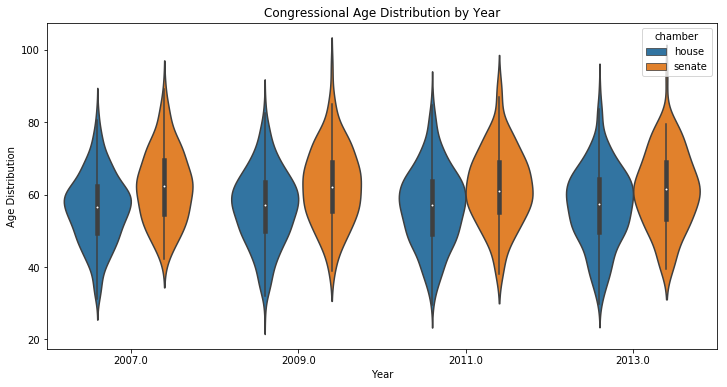

In [12]:
# Create a subset of the congressional data where we only keep the data from 2007 onward
congress_2007 = congress.drop(congress[congress['year'] < 2007].index)

# Use seaborn and matplotlib to create a violin plot of the house and senates age distribution by year
plt.figure(figsize=(12,6))
sns.violinplot(x='year', y='age', hue='chamber', data=congress_2007)
plt.title('Congressional Age Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Age Distribution')
plt.show()

Those distributions are looking pretty normal! That's a good sign. But lets do a more analytical test to be sure.

Here we use scipy's implementation of the Anderson-Darling test, which "tests the null hypothesis that a sample is drawn from a population that follows a particular distribution". We will be using it to test if our data is normal. 
We pass it an array of values and it will output the tests statistic and the critical values for a variety of different common significance levels (alpha). If the test statistic is larger than the critical value at our desired significance level, we reject the null hypothesis and the distribution is not normal, else the null hypothesis holds and the distribution is normal. This process for this test is illustrated below: 

*Note: To learn more about the Anderson-Darling test and testing for normality in python see the tutorial <a href="https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/">here</a> and scipy's documentation <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html">here</a>.*

In [13]:
# Group the congressional data (since 2007) by chamber
by_chamber_2007 = congress_2007.groupby('chamber')

# Retrieve each the house and the senate and group them by year
house_by_year_2007 = by_chamber_2007.get_group('house').groupby('year')
senate_by_year_2007 = by_chamber_2007.get_group('senate').groupby('year')

# Perform the test on the age distribution of the house from 2007
results = stats.anderson(house_by_year_2007.get_group(2007)['age'].values)
results

AndersonResult(statistic=0.3275361991770751, critical_values=array([ 0.571,  0.65 ,  0.78 ,  0.91 ,  1.082]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

As you can see in the example above, we get a test statistic and an array of critical values. As is pretty common we will be using a significance level of 5%. So we can check the corresponding critical value and see that .32 < .78. Our test statistic is not greater than our critical value so we cannot reject the null hypothesis and the 2007 House's age distribution is normal. We can repeat this process for the House and Senate from 2007-2013:

In [14]:
# Iterate over the house data and test if the data is normal at each year
for year, df in house_by_year_2007:
    results = stats.anderson(df['age'].values, dist='norm')
    # Test against the significance level of 5%
    if results.statistic < results.critical_values[2]:
        print('The {} House\'s age follows a normal distribution.'.format(year))
    else:
        print('The {} House\'s age does NOT follow a normal distribution.'.format(year))

# Iterate over the senate data and test if the data is normal at each year
for year, df in senate_by_year_2007:
    results = stats.anderson(df['age'].values, dist='norm')
    # Test against the significance level of 5%
    if results.statistic < results.critical_values[2]:
        print('The {} Senate\'s age follows a normal distribution.'.format(year))
    else:
        print('The {} Senate\'s age does NOT follow a normal distribution.'.format(year)) 

The 2007.0 House's age follows a normal distribution.
The 2009.0 House's age follows a normal distribution.
The 2011.0 House's age follows a normal distribution.
The 2013.0 House's age follows a normal distribution.
The 2007.0 Senate's age follows a normal distribution.
The 2009.0 Senate's age follows a normal distribution.
The 2011.0 Senate's age follows a normal distribution.
The 2013.0 Senate's age follows a normal distribution.


Great! We can see that both the House and the Senate's ages followed a normal distribution from 2007-2013. Therefore, it is a pretty reasonable assumption to say that the ages followed a normal distribution for the following two Congress's in 2015 and 2017. Assuming that the age distribution was normal in these years, the median and mean are the same! So we can simply get each Congress's average age from online and put them into our dataframe manually. We retrieved this data from the Congressional Research Service's reports on the <a href="https://fas.org/sgp/crs/misc/R43869.pdf">114th</a> and <a href="https://fas.org/sgp/crs/misc/R44762.pdf">115th</a> Congress.

Finally, we get our complete dataframe with the 2015-2017 Congressional data:

In [15]:
# Store the values in variables manually
house_114, house_115, senate_114, senate_115 = 57, 57.8, 61, 61.8

# Append each of the values to the array. It may not be pretty, but for such a small data set 
# it's simple just to enumerate each value
industry = industry.append({'year': 2015, 'industry': 'House', 'median_age': house_114}, ignore_index=True)
industry = industry.append({'year': 2016, 'industry': 'House', 'median_age': house_114}, ignore_index=True)
industry = industry.append({'year': 2017, 'industry': 'House', 'median_age': house_115}, ignore_index=True)
industry = industry.append({'year': 2015, 'industry': 'Senate', 'median_age': senate_114}, ignore_index=True)
industry = industry.append({'year': 2016, 'industry': 'Senate', 'median_age': senate_114}, ignore_index=True)
industry = industry.append({'year': 2017, 'industry': 'Senate', 'median_age': senate_115}, ignore_index=True)

industry.tail()

,year,industry,median_age
100,2016,House,57.0
101,2017,House,57.8
102,2015,Senate,61.0
103,2016,Senate,61.0
104,2017,Senate,61.8


Perfect! Now we have a complete dataset with Congress's median age from 2011 - 2017. 

#### How does Congress stack up?

Now that we have our dataset sorted out let's see how Congress compares to the rest of the American industries. We can make a simple scatter plot with a regression line to see if there are any trends.

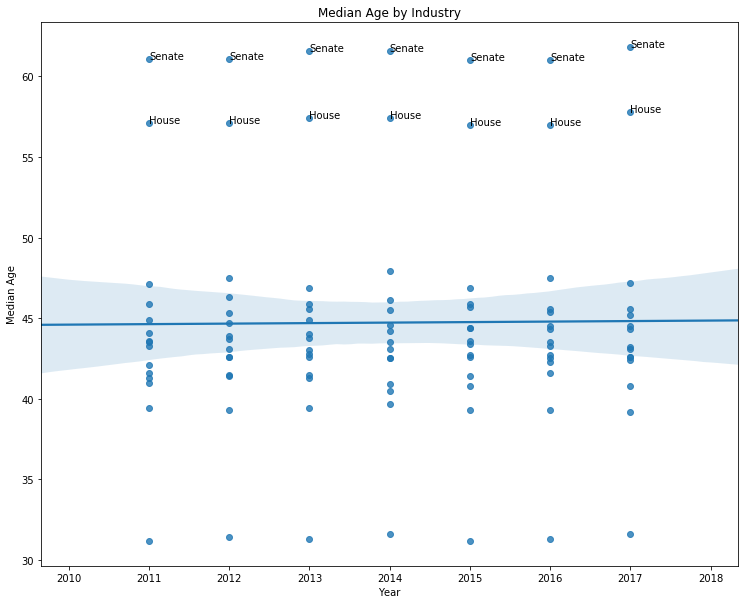

In [16]:
# Create a plot figure using matplotlib and retrieve the median age and year data
plt.figure(figsize=(12.5,10))
x = industry['year']
y = industry['median_age']

# Make regression scatter plot using seaborn
sns.regplot(x=x, y=y)

# Adjust plot labels
plt.title('Median Age by Industry')
plt.xlabel('Year')
plt.ylabel('Median Age')

# Add notations to the House and Senate data points
for i, txt in enumerate(industry['industry']):
    if txt == 'Senate' or txt == 'House':
        plt.annotate(txt, (x[i], y[i]))

Wow, so Congress seems to be a lot older than other US industries. The median age seems to hover somewhere around 45 years for most US industries, but Congress is way above with the House's median age seeming to be around 57 and the Senate's around 61. So we definitely know that Congress is old compared to the rest of the US industries, but by how much?

### 3.2 How much older is Congress?

To see how much older Congress currently is, let's focus on the 2017 Congress. Ideally, we can give a quick and easy answer as to how much older Congress is using the <a href="https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule">68-95-99.7 rule</a>, but this rule only applies if the distribution is normal. So let's check if it is!

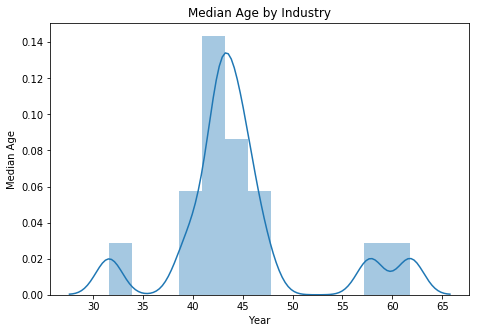

The 2017 Industry's age does NOT follow a normal distribution.


In [17]:
# Retrieve the industry data from 2017
industry_2017 = industry.groupby('year').get_group(2017)

# Create a figure using matplotlib
plt.figure(figsize=(7.5,5))

# Make regression plot using seaborn
sns.distplot(industry_2017['median_age'])

# Adjust plot labels using matplotlib
plt.title('Median Age by Industry')
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.show()

# Test analytically whether the distribution is normal
results = stats.anderson(industry_2017['median_age'], dist='norm')
# Test against the significance level of 5%
if results.statistic < results.critical_values[2]:
    print('The 2017 Industry\'s age follows a normal distribution.')
else:
    print('The 2017 Industry\'s age does NOT follow a normal distribution.')

No luck. Looking at the distribution graphically it doesn't appear to be very normal at all and a quick Anderson test confirms our suspicions. Because the distribution isn't normal, it will be a little bit harder to get an exact quantitative measure of just how much older Congress is than the average US worker, at least with the data we have. With more data and a full distribution of the age of workers across the US (which would almost certainly be normal), we could use the 68-95-99.7 rule and calculate exactly what percentile Congress is. But, with only 15 data points of the median age (rather than full data) across industries, we'll have to resort to slightly more primitive measures.

Luckily, we don't need a lot of clarity here since we are just trying to figure out if Congress is significantly older than other industries and if so, roughly by how much. To keep things simple, we'll just be using a <a href="https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots">boxplot</a> to check just how far out Congress is compared to the rest of the pack. (Click on the link to learn how to read them!)

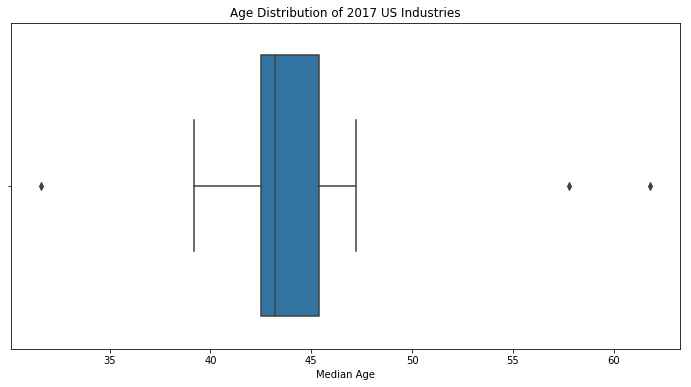

In [18]:
# Use seaborn and matplotlib to create a boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=industry_2017['median_age'])
plt.title('Age Distribution of 2017 US Industries')
plt.xlabel('Median Age')
plt.show()

Looking at the boxplot we can see that the House and Senate are huge outliers. The inter-quartile range (IQR) and the wiskers on the boxplot are relatively small, showing that generally we have a pretty tight distribution. However, the House and Senate lie far outside of the IQR and the upper bound, within which nearly 100% of the values fall. So we now know that the House and Senate are not only outliers, but are basically unique compared to the rest of the industry as far as age is concerned. 

(Read <a href="https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots">this</a> if you didn't get any of that.)

To be a little more quantitative lets how many standard deviations away from the mean the House and Senate are.

In [19]:
# Retrieve the mean and standard deviation of the industry data
age_2017 = industry_2017['median_age']
mean = age_2017.mean()
std = age_2017.std()

# Compute the z-score
z_house = (house_115 - mean)/std
z_senate = (senate_115 - mean)/std

print('The House\'s age was {:.4f} standard devations from the mean in 2017.'.format(z_house))
print('The Senate\'s age was {:.4f} standard devations from the mean in 2017.'.format(z_senate))

The House's age was 1.8298 standard devations from the mean in 2017.
The Senate's age was 2.3925 standard devations from the mean in 2017.


If this were a normal distribution 2 standard deviations would put the House and Senate in the top 5% of the age distribution. But seeing as this is not a normal distribution and the House and Senate are outliers, they are actually even more abnormal and are in much smaller percentage of the top ages. Though this isn't very quantitiative, it does definitively display that the House and Senate are extreme outliers and are much older than the rest of US industries.

## 4. Is Congress Aging?

Now that we know that Congress is much older than other industries, we have another question. Despite the large age difference that already separates Congress, are Congresses getting older still? To examine this we first want to get a feel for the Congressional age data, so lets put it in a scatter plot.

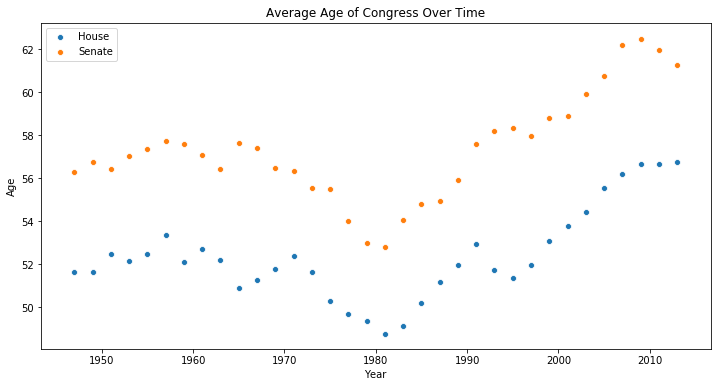

In [20]:
# Get the average age from the house and senate dataframes (grouped by year)
house_avg_age = house_by_year['age'].mean()
senate_avg_age = senate_by_year['age'].mean()

# Use matplotlib and seaborn to plot the data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=house_avg_age)
sns.scatterplot(data=senate_avg_age)
plt.title('Average Age of Congress Over Time')
plt.xlabel('Year')
plt.ylabel('Age')
plt.legend(['House', 'Senate'])
plt.show()

A quick look at the scatter plot shows that there definitely has been a steep increase in the average age of House and Senate since about 1980, with a slight plateau/dip in the past few years.

It definitely seems like Congressmembers are getting older as time goes on, but maybe this is a product of something other than the composition of Congress, like increasing life expectancy. Let's change our data to compensate for changes in life expectancy and see if the trend holds. We do this by using our life expectancy dataframe to add a column that is the ratio of each Congressmember's age to the average life expectancy during that year.

While we're adjusting our data, let's truncate our dataset a bit. Though all of this data is interesting, age data from the 1940s isn't extremely relevant to the age of Congressmembers now. To compensate for this let's take a subset of the data that's more relevant to our overarching theme of Congressional computer smarts. Personal computers <a href="https://en.wikipedia.org/wiki/Home_computer"> first came out in the late 1970s</a> and became increasingly popular in the early and mid 80s until they became a common household item. So let's look at the data from 1977, when personal computers became available, to now.

In [21]:
# Create a subset of the data from 1977-present to focus in on a more current era
congress_1977 = congress.drop(congress[congress['year'] < 1977].index)

# Add a row to the dataframe that is the ratio of the Congressmember's age and the average life expectancy at the time
for i, row in congress_1977.iterrows():
    congress_1977.at[i, 'life_exp_ratio'] = row['age']/lifeExp.at[int(row['year']), 'Average Life Expectancy (Years)']
    
congress_1977.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,year,life_exp_ratio
8275,95,house,N000113,Robert,Nelson Cornelius,Nix,Sr.,1898-08-09,PA,D,Yes,1/4/77,78.4,1977.0,1.069577
8276,95,house,P000398,William,Robert,Poage,NaN,1899-12-28,TX,D,Yes,1/4/77,77.0,1977.0,1.050477
8277,95,house,P000218,Claude,Denson,Pepper,NaN,9/8/00,FL,D,Yes,1/4/77,76.3,1977.0,1.040928
8278,95,house,M000065,George,Herman,Mahon,NaN,9/22/00,TX,D,Yes,1/4/77,76.3,1977.0,1.040928
8279,95,house,D000211,James,Joseph,Delaney,NaN,3/19/01,NY,D,Yes,1/4/77,75.8,1977.0,1.034106


Done. Now we have a smaller subset of the data and a new column "life_exp_ratio". As stated above this is just the ratio of the Congressmember's age and the life expectancy at that time in history. This ratio essentially represents what percentage of their expected lifetime the Congressmember had "completed". It's a little grim, but should serve well for our purposes. Now let's plot the data again and see if the compensated age (or rather life expectancy ratio) still increases over time. 

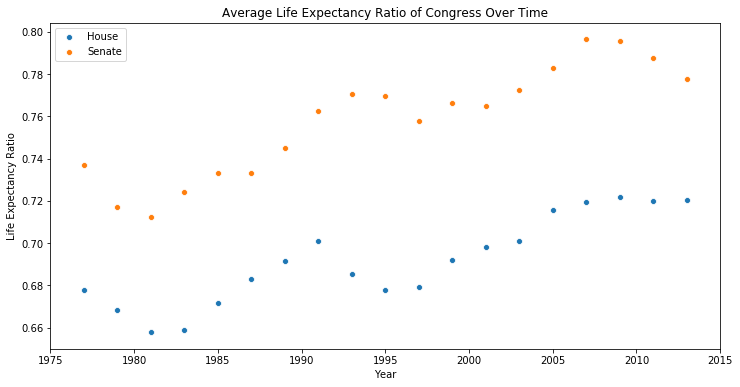

In [22]:
# Group our data subset by chamber and extract the yearly data for both the house and senate
by_chamber_1977 = congress_1977.groupby('chamber')
house_by_year_1977 = by_chamber_1977.get_group('house').groupby('year')
senate_by_year_1977 = by_chamber_1977.get_group('senate').groupby('year')

# Get the mean for each year
house_life_exp_1977 = house_by_year_1977['life_exp_ratio'].mean()
senate_life_exp_1977 = senate_by_year_1977['life_exp_ratio'].mean()

# Use seaborn and matplotlib to plot the data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=house_life_exp_1977)
sns.scatterplot(data=senate_life_exp_1977)
plt.title('Average Life Expectancy Ratio of Congress Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy Ratio')
plt.legend(['House', 'Senate'])
plt.show()

It defintely seems as though the increasing trend still holds for both the House and Senate after compensating for life expectancy. The increase is a little bit less dramatic, but definitely still seems to be there. Let's use scipy to fit some trendlines and see what they can tell us.

*Note: Generally, I would recommend using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn's Linear Model</a> rather than <a href="https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html">scipy's Linear Regression</a>. This is because sklearn's implementation fits a linear model that can use **n** attributes to fit a model, whereas scipy's only uses one attribute. However, scipy's model also performs a hypothesis test with the null hypothesis that the slope is zero, which is useful for our tests. And since we are only using one attribute, scipy's model will do for our application. That being said, <a href="https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html">stats model</a> provides a linear model function that provides both a good fit and multiple other test statistics, but it is a bit overkill for our model. For any linear modeling you plan on doing, I would suggest looking at all three and determining which is best for your application.*

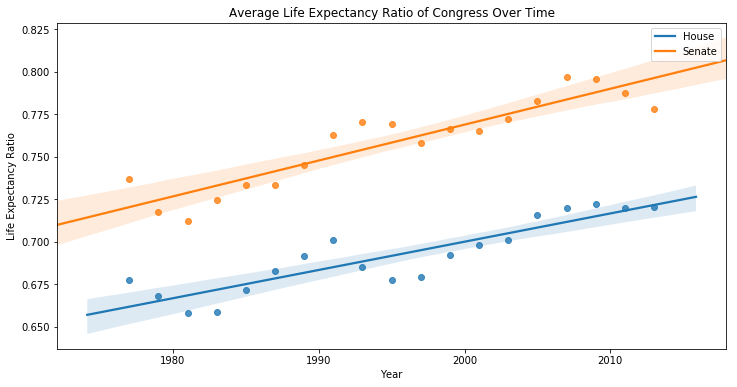

In [23]:
# Retrieve the life expectancy years and values from the series in the previous cell
x_house = house_life_exp_1977.index.values
y_house = house_life_exp_1977.values

x_sen = senate_life_exp_1977.index.values
y_sen = senate_life_exp_1977.values

# Use seaborn and matplotlib to plot the data and regression lines
plt.figure(figsize=(12 ,6))
sns.regplot(x=x_house, y=y_house)
sns.regplot(x=x_sen, y=y_sen)
plt.title('Average Life Expectancy Ratio of Congress Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy Ratio')
plt.legend(['House', 'Senate'])
plt.show()

The linear regression graphs above seems to support our hypothesis of increasing age, let's see if a linear model supports it:

In [24]:
lm_house = stats.linregress(x_house, y_house)
lm_sen = stats.linregress(x_sen, y_sen)

lm_house

LinregressResult(slope=0.0016614707956097122, intercept=-2.6229513885973321, rvalue=0.89245070286448214, pvalue=2.801855836658906e-07, stderr=0.00020370425052722879)

As you can see, scipy's linregress outputs the parameters of the line and the R value (not R^2!) as well as a pvalue (for the null hypothesis of zero slope) and standard error.

In [25]:
print('House R^2 Value: {:.4f}'.format(lm_house[2]**2))
print('House P-Value: {}\n'.format(lm_house[3]))

print('Senate R^2 Value: {:.4f}'.format(lm_sen[2]**2))
print('Senate P-Value: {}'.format(lm_sen[3]))

House R^2 Value: 0.7965
House P-Value: 2.801855836658906e-07

Senate R^2 Value: 0.8359
Senate P-Value: 4.396642566737352e-08


Checking our linear models, we get pretty good fits. Around .8 is not perfect, but still very good and the p-value for both the House and Senate show that we can reject the null hypothesis of zero slope. Therefore, we know that we have a good linear regression fit that proves that Congress is aging. With the House's average age increasing from about 66% to 70% of the period life expectancy over 30 years and the Senates average age increasing from about 70% to 80% of the period life expectancy over 30 years (according to the linear model). 

Now that we know that Congress is increasing in age can we find some possible reasons why?

## 5. Why is Congress Getting Older?

### 5.1 Term Counts! 

The first possible explanation for Congress's increasing age is that people are staying in office longer. As they stay in office and age, they drive the average age of Congress up. Let's see if our data can prove or disprove this hypothesis.

First, let's add an extra column that counts the number of terms each Congressmember served using their unique "bioguide" as a keying value. We have to be careful to only count the terms they served prior to the given date. For example, if Bill from the House served three terms starting in 1991, 1993, and 1995, in 1993 his term count would be 2, but in 1995 it would be 3. If we simply counted the absolute number of terms Bill served and assigned a term count of 3 to the 1991 and 1993 Congress, we would artificially drive up the average term count for those years. Let's not do that!

It is important to note that this method of counting terms may cause some bias. Since our term count data only counts terms served from 1947 to 2013, we could have a problem. Say a person in the 1947 Congress had served 4 terms prior to 1947 and 5 terms afterward. Their total term count should be 9, but our data would say it was 5, potentially skewing the data. By counting the terms starting at 1947 and then taking a subset of the data from 1977 onward, we can minimize the chance of this happening (because it is not likely for someone who served prior to 1947 to still be serving in 1977), but it is still important to be conscious of possible bias.

Also, to keep things simple we will only be looking at the term counts in the House, since their terms are only two years and line up with our data (unlike the 6 year Senate terms). 

*Note: We count the terms for the entire dataset with the method below, but will only be using the portion related to the House. The term count for the Senate is likely innacurate.*

In [26]:
# Copy the congress database and initialize a dictionary that will use bioguides as keys and current 
# term count as values
congress_counts = congress
count = {}

# Iterate over the dataframe and add a column that counts the number of terms so far
for i, row in congress_counts.iterrows():
    bioguide = row['bioguide']
    if bioguide in count:
        count[bioguide] += 1
    else:
        count[bioguide] = 1
        
    congress_counts.loc[i, 'term_count'] = count[bioguide]
    
congress_counts.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,year,term_count
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1/3/47,85.9,1947.0,1.0
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1/3/47,83.2,1947.0,1.0
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1/3/47,80.7,1947.0,1.0
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1/3/47,78.8,1947.0,1.0
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1/3/47,78.3,1947.0,1.0


Perfect. So we have a dataframe that includes the term counts, now let's do a quick spot check to make sure our count is accurate.

In [27]:
congress_counts.loc[congress['term_count'].idxmax()]

congress          113
chamber         house
bioguide      D000355
firstname        John
middlename         D.
               ...   
incumbent         Yes
termstart      1/3/13
age              86.5
year             2013
term_count         30
Name: 18092, Length: 15, dtype: object

Our spot check reveals that we found the maximum number of terms served to be 30, served by John Dingell of Michigan (D000355). Checking online we find that this is in fact <a href="https://en.wikipedia.org/wiki/John_Dingell"> true</a>. John Dingell served in the House of Representatives from 1955 - 2015. Which is a lot of terms. But luckily it looks like we have an accurate term count.

Now let's see what our the term counts look like over time:

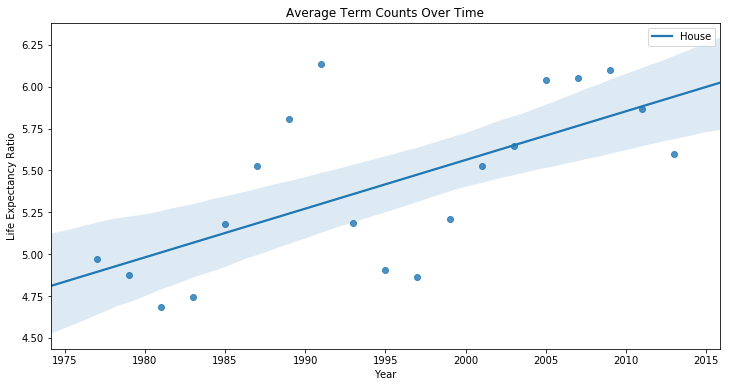

In [28]:
# Get a subset of our data for Congresses after 1977, extract the data for the house, and group it by year
congress_counts_1977 = congress_counts.drop(congress_counts[congress_counts['year'] < 1977].index)
by_chamber_counts_1977 = congress_counts_1977.groupby('chamber')
house_by_year_counts_1977 = by_chamber_counts_1977.get_group('house').groupby('year')

# Get the average term count by year
house_avg_counts_1977 = house_by_year_counts_1977['term_count'].mean()

# Plot term count data
plt.figure(figsize=(12, 6))
sns.regplot(x=house_avg_counts_1977.index.values, y=house_avg_counts_1977.values)
plt.title('Average Term Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy Ratio')
plt.legend(['House'])
plt.show()

In [29]:
lm_terms = stats.linregress(house_avg_counts_1977.index.values, house_avg_counts_1977.values)

print("House R^2: {:.4f}".format(lm_terms[2]**2))
print("House Slope: {:.4f}".format(lm_terms[0]))

House R^2: 0.4341
House Slope: 0.0291


This data is pretty noisy and that trendline doesn't look like it fits very well which doesn't bode well for us. But the way the term count data is laid out looks earily familiar. Looking back up, it seems to follow almost the exact same pattern as Congress's age data (compensated for life expectancy) over time. Let's look at that plot again.

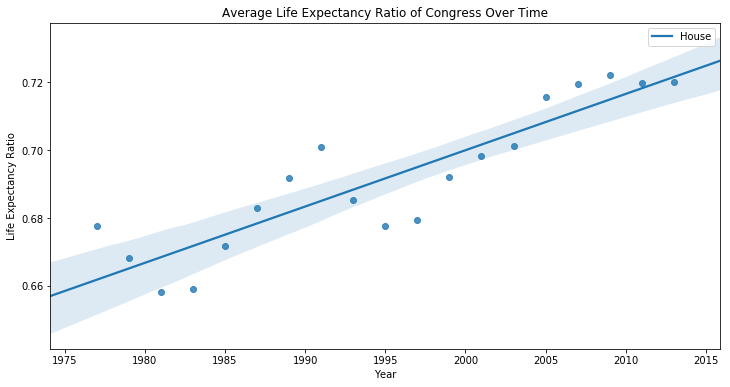

In [30]:
# Plot life expectancy data
plt.figure(figsize=(12, 6))
sns.regplot(x=house_life_exp_1977.index.values, y=house_life_exp_1977.values)
plt.title('Average Life Expectancy Ratio of Congress Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy Ratio')
plt.legend(['House'])
plt.show()

Replotting the Congressional age data confirms our suspicions that the two datasets follow the same trend! Let's test our intuition with a quick regression test. Here we use <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html">scipy's implementation of the Pearson Test</a> which returns the <a href="https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/correlation-coefficient-formula/">correlation coefficient</a> between two datasets and the p-value for a null hypothesis that the correlation coefficient is spurious.

In [31]:
# Perform the test and print out the values
r, p_val = stats.pearsonr(house_avg_counts_1977, house_life_exp_1977)
print('House age data (compensated for life expectancy) vs house term count correlation coefficient: {:.4f}'
      .format(r))
print('P-value for the above relationship: {}'
      .format(p_val))

House age data (compensated for life expectancy) vs house term count correlation coefficient: 0.8841
P-value for the above relationship: 5.13668156585113e-07


That is a very high correlation coefficient! It's not a perfect linear relationship, but at about .9 it is a very good fit. The p-value confirms that the similarity between the two datasets is not random.

As we know, correlation is not the same as causation, but this high correlation certainly suggests that term counts and the age of the House is strongly linked. Accordingly, it is highly likely that our hypothesis is true and that the increase in term counts is at least part of the culprit behind the increasing age of Congress!

### 5.2 Re-Election of Incumbents

Though we have shown that term counts and the age of Congress are highly correlated, we are not totally satisfied. Maybe there is another reason behind the increase that we can quantify with this dataset, so let's check it out. 

Another interesting possible explanation for why Congress's age is increasing is the re-election of incumbents, so let's check it out.

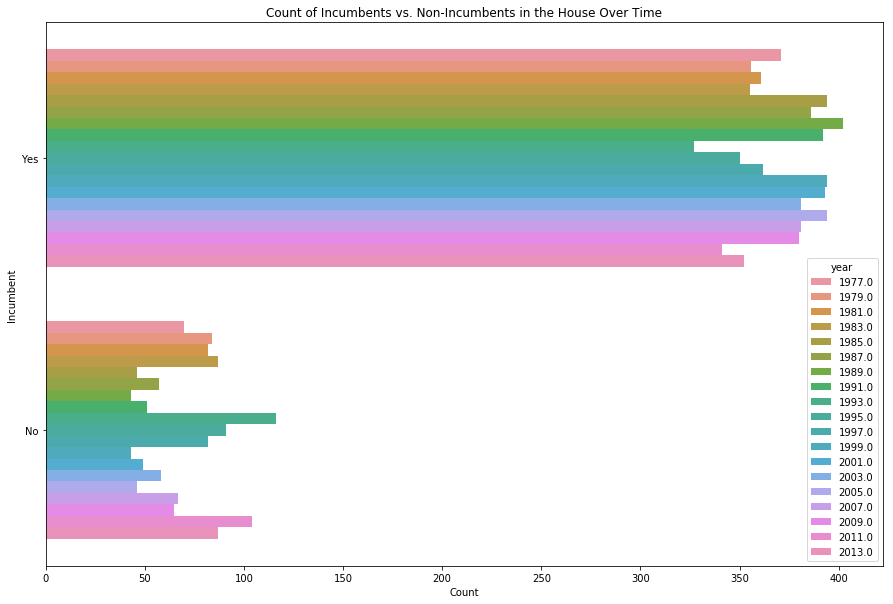

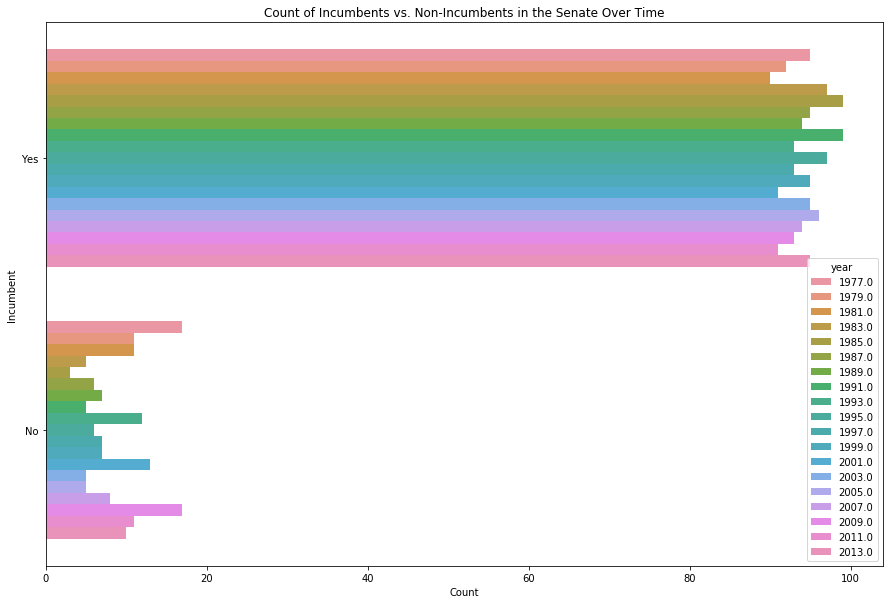

In [32]:
# Retrieve the house and senate data
house_1977 = by_chamber_1977.get_group('house')
senate_1977 = by_chamber_1977.get_group('senate')

# Use seaborn and matplotlib to create a countplot for the house
plt.figure(figsize=(15,10))
sns.countplot(y='incumbent', hue='year', data=house_1977)
plt.title('Count of Incumbents vs. Non-Incumbents in the House Over Time')
plt.xlabel('Count')
plt.ylabel('Incumbent')
plt.show()

# Use seaborn and matplotlib to create a countplot for the senate
plt.figure(figsize=(15,10))
sns.countplot(y='incumbent', hue='year', data=senate_1977)
plt.title('Count of Incumbents vs. Non-Incumbents in the Senate Over Time')
plt.xlabel('Count')
plt.ylabel('Incumbent')
plt.show()

This data is interesting as it shows the massive percentage of incumbents being re-elected vs. the relatively small amount of newcomers to Congress each year, but in hindsight it doesn't tell us much about our goal that we didn't already learn from the term counts. The count of incumbents in the house each year follows the same distribution as the term counts does. Which makes sense, because whenever an incumbent is re-elected their term count is increased.

That being said, it does lead to another possible explanation for why the age of Congress is increasing. We've already looked at how aging incumbents adds to the age of Congress (and they seem to make up a large majority of this contribution based on the graph above), but what do the newcomers (non-incumbents) add to the age? Are the non-incumbents we elect getting younger or older or staying about the same over time? Let's take a look.

### 5.3 Age of Non-Incumbents Increasing?

Now we want to check if the age of the non-incumbents is increasing over time in the House and the Senate. Like before, let's get our data, visualize it, fit a model, and perform some hypothesis testing.

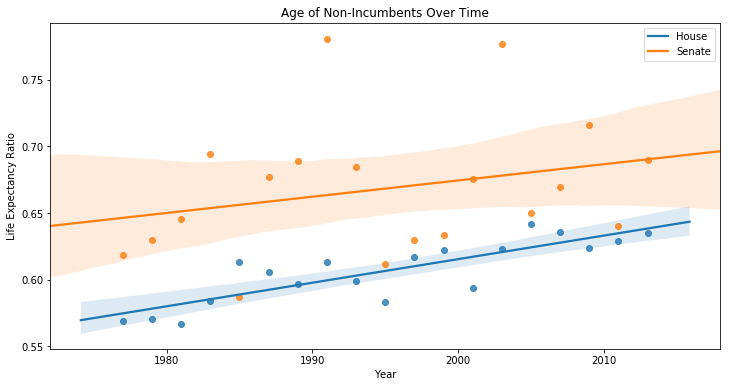

In [33]:
# Get the non-incumbents from the house, group them by year, and get their age
house_non_incumbent = house_1977.groupby('incumbent').get_group('No')
house_non_incumbent_age = house_non_incumbent.groupby('year')['life_exp_ratio'].mean()

# Get the non-incumbents from the senate, group them by year, and get their age
senate_non_incumbent = senate_1977.groupby('incumbent').get_group('No')
senate_non_incumbent_age = senate_non_incumbent.groupby('year')['life_exp_ratio'].mean()

# Retrieve the data from the dataframes
x_hs = house_non_incumbent_age.index.values
y_hs = house_non_incumbent_age.values
x_sen = senate_non_incumbent_age.index.values
y_sen = senate_non_incumbent_age.values

# Use matplotlib and seaborn to plot the data
plt.figure(figsize=(12, 6))
sns.regplot(x=x_hs, y=y_hs)
sns.regplot(x=x_sen, y=y_sen)
plt.title('Age of Non-Incumbents Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy Ratio')
plt.legend(['House', 'Senate'])
plt.show()

The Senate data is very noisy, but the House is not as bad and it seems like the age in the House is increasing slowly. Let's check with a linear model.

In [34]:
# Fit the models
house_model = stats.linregress(x_hs, y_hs)
senate_model = stats.linregress(x_sen, y_sen)

# Check the R^2 and p-values
print('House R^2 Value: {:.4f}'.format(house_model[2]**2))
print('House P-Value: {}\n'.format(house_model[3]))

print('Senate R^2 Value: {:.4f}'.format(senate_model[2]**2))
print('Senate P-Value: {:.4f}'.format(senate_model[3]))

House R^2 Value: 0.7038
House P-Value: 7.172970937799799e-06

Senate R^2 Value: 0.0729
Senate P-Value: 0.2637


Looking at the models, it seems like we don't have a very good fit for the Senate cannot reject the null hypothesis of zero slope. So it looks like the age of non-incumbents is not increasing significantly over time in the Senate.

However, in the House we have a pretty good fit of .7, showing that our model is relatively well fitted. The p-value also suggests that the fit is good and we can reject the null hypothesis of no slope. Though the fit is not perfect, we have some decent evidence to suggest that the age of non-incumbents in the House has increased significantly over time.

## 6. Conclusion

From our analysis we were able to learn a lot about the age composition of Congress and possible reasons as to why there are disparities between Congress and the rest of the US industries. We found that on average both chambers of Congress are significantly older any other US industry. While this result is likely not surprising to most people, the extent to which they are older may be. Congress is an extreme outlier from an age perspective.

Furthermore, though Congress is older than most other industries, it is still getting older. This is likely due to a variety of things including the age requirements for Congress (25 for the House and 30 for the Senate), but we found the Congressmembers are, on average, serving more terms than 30 years ago and newcomers to Congress are getting older. Both of these increase the age of Congress and increase the gap between Congress and the rest of the industry.

Now, there is not intrinsic problem with having an older governing body. Some may think that more experience with age is good! This is likely true, but in such a dynamic and changing time both socially and technologically having the right background and experience is important too. And as we discussed in the intro, older people *usually* have very different levels of experience with computers and technology than younger people. So maybe in a world that is increasingly powered by computers a little more age diversity (among other diversity) could help push our country forward.

I hope this article has shed a little bit more light on the US Congress and motivated a few more people to learn about our government. If you agree that it could be improved I encourage you to take action and participate in the election process. Vote for people you believe have the knowledge and power to change the country for the better and if you can't find that person on the ballot, maybe run for office yourself!

---

Thanks for reading! Please let me know if you have any comments or critiques!

---
        
## Data Sources

Congressional Age: https://github.com/fivethirtyeight/data/tree/master/congress-age

Industry Data: https://www.bls.gov/cps/demographics.htm#age

Life Expectancy Data: https://catalog.data.gov/dataset/age-adjusted-death-rates-and-life-expectancy-at-birth-all-races-both-sexes-united-sta-1900